In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pd_data = pd.read_csv('data/920TEST1.csv')

In [5]:
# Time,Pe,Tm,delta,Pt,w,Te
pd_data.columns = ['Time', 'Pe', 'Tm', 'delta', 'Pt', 'w']

In [6]:
pd_data

,Time,Pe,Tm,delta,Pt,w
0,0.00000,-0.001771,0.000000,-0.000710,-0.001771,314.159271
1,0.00005,-0.001771,0.000000,-0.000710,-0.001771,314.159271
2,0.00010,-0.001771,0.000000,-0.000710,-0.001771,314.159271
3,0.00015,-0.001771,0.000000,-0.000710,-0.001771,314.159271
4,0.00020,-0.001771,0.000000,-0.000710,-0.001771,314.159271
...,...,...,...,...,...,...
7995,0.39975,0.488091,1.056364,0.578104,0.502388,297.245837
7996,0.39980,0.488098,1.056365,0.578137,0.502388,297.245765
7997,0.39985,0.488106,1.056365,0.578170,0.502388,297.245693
7998,0.39990,0.488113,1.056365,0.578203,0.502388,297.245620


(pd_data.w/314 * pd_data.Tm - (pd_data.Pt/.3007)).plot()
# （2023-09-19 12:18:49）结果表明Pt非标幺不可直接参与计算，有名值基准值未知，目前看起来可能在计算过程中有按步长修改基准值的可能，暂时放弃有名值计算，改为标幺值

In [8]:
# 求w转速的微分，即dw_dt
a = ((pd_data.w[2:].to_numpy() - pd_data.w[:-2].to_numpy())/2/(pd_data.Time[1] - pd_data.Time[0]))
3*a/314

array([ 0.        ,  0.        ,  0.        , ..., -0.01383439,
       -0.01384395, -0.01384395])

In [9]:
# 2023-09-19 12:30:26 计算电磁转矩Te，全程标幺值计算
dw_dt = 2*1.5*((pd_data.w[2:].to_numpy() - pd_data.w[:-2].to_numpy())/2/314/(pd_data.Time[1] - pd_data.Time[0]))
dw_dt

array([ 0.        ,  0.        ,  0.        , ..., -0.01383439,
       -0.01384395, -0.01384395])

In [12]:
pd_data['Te'] = ((pd_data.Tm)[1:-1] - 2*1.5*((pd_data.w[2:].to_numpy() - pd_data.w[:-2].to_numpy())/2/314/(pd_data.Time[1] - pd_data.Time[0])))

In [13]:
pd_data

,Time,Pe,Tm,delta,Pt,w,Te
0,0.00000,-0.001771,0.000000,-0.000710,-0.001771,314.159271,NaN
1,0.00005,-0.001771,0.000000,-0.000710,-0.001771,314.159271,0.000000
2,0.00010,-0.001771,0.000000,-0.000710,-0.001771,314.159271,0.000000
3,0.00015,-0.001771,0.000000,-0.000710,-0.001771,314.159271,0.000000
4,0.00020,-0.001771,0.000000,-0.000710,-0.001771,314.159271,0.000000
...,...,...,...,...,...,...,...
7995,0.39975,0.488091,1.056364,0.578104,0.502388,297.245837,1.070208
7996,0.39980,0.488098,1.056365,0.578137,0.502388,297.245765,1.070199
7997,0.39985,0.488106,1.056365,0.578170,0.502388,297.245693,1.070209
7998,0.39990,0.488113,1.056365,0.578203,0.502388,297.245620,1.070209


In [14]:
pd_data.loc[0,'Te'] = pd_data.loc[1,'Te']

In [15]:
pd_data.loc[7999,'Te'] = pd_data.loc[7998,'Te']

In [16]:
pd_data.w = pd_data.w / 314

In [17]:
pd_data

,Time,Pe,Tm,delta,Pt,w,Te
0,0.00000,-0.001771,0.000000,-0.000710,-0.001771,1.000507,0.000000
1,0.00005,-0.001771,0.000000,-0.000710,-0.001771,1.000507,0.000000
2,0.00010,-0.001771,0.000000,-0.000710,-0.001771,1.000507,0.000000
3,0.00015,-0.001771,0.000000,-0.000710,-0.001771,1.000507,0.000000
4,0.00020,-0.001771,0.000000,-0.000710,-0.001771,1.000507,0.000000
...,...,...,...,...,...,...,...
7995,0.39975,0.488091,1.056364,0.578104,0.502388,0.946643,1.070208
7996,0.39980,0.488098,1.056365,0.578137,0.502388,0.946643,1.070199
7997,0.39985,0.488106,1.056365,0.578170,0.502388,0.946642,1.070209
7998,0.39990,0.488113,1.056365,0.578203,0.502388,0.946642,1.070209


In [22]:
pd_data.to_csv('data/920test1_te.csv')

<Axes: >

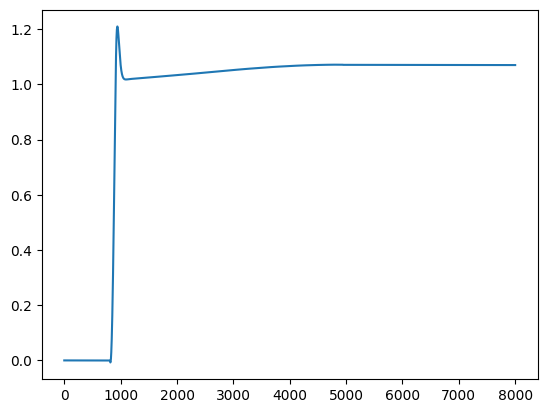

In [23]:
pd_data.Te.plot()

<Axes: >

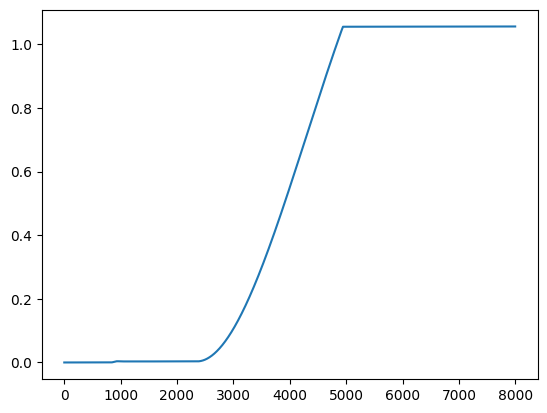

In [25]:
(((pd_data.Tm)[1:-1] - 2*1.5*((pd_data.w[2:].to_numpy() - pd_data.w[:-2].to_numpy())/2/314/(pd_data.Time[1] - pd_data.Time[0])))).plot()

In [ ]:
(pd_data.Time[1] - pd_data.Time[0])

In [ ]:
(pd_data.delta[2:].to_numpy() + pd_data.delta[:-2].to_numpy() - 2* pd_data.delta[1:-1].to_numpy())/2/(pd_data.Time[1] - pd_data.Time[0])

In [ ]:
(pd_data.w[2:].to_numpy() - pd_data.w[:-2].to_numpy())/2/(pd_data.Time[1] - pd_data.Time[0])

In [ ]:
result_minus = pd.Series(pd_data.delta[2:].to_numpy() + pd_data.delta[:-2].to_numpy() - 2* pd_data.delta[1:-1].to_numpy())/2/(pd_data.Time[1] - pd_data.Time[0]) -\
(pd_data.w[2:].to_numpy() - pd_data.w[:-2].to_numpy())/2/(pd_data.Time[1] - pd_data.Time[0])

In [ ]:
result_minus[800:].value_counts()

In [ ]:
result_minus[1000:].plot()

In [ ]:
result = pd.Series((pd_data.delta[2:].to_numpy() + pd_data.delta[:-2].to_numpy() - 2* pd_data.delta[1:-1].to_numpy())/((pd_data.w[2:].to_numpy() - pd_data.w[:-2].to_numpy())/2))

In [ ]:
result.plot()

In [ ]:
result.describe()

In [ ]:
result.value_counts()

In [ ]:
result2 = result[~result.isin([np.nan, np.inf, -np.inf])]

In [ ]:
result2.plot()

In [ ]:
result2[800:].plot()

In [ ]:
result2[1000:].describe()

In [ ]:
(pd_data.w[:-1] -  (pd_data.delta[1:]-pd_data.delta[:-1])/(pd_data.Time[1]-pd_data.Time[0])).value_counts()

In [ ]:
(pd_data.w[1: ] -  (pd_data.delta[1:]-pd_data.delta[:-1])/(pd_data.Time[1]-pd_data.Time[0])).plot()

In [ ]:
(pd_data.w[1: ] -  (pd_data.delta[1:]-pd_data.delta[:-1])/(pd_data.Time[1]-pd_data.Time[0])).value_counts().head(20)

In [ ]:
(pd_data.w[1: ] -  (pd_data.delta[1:]-pd_data.delta[:-1])/(pd_data.Time[1]-pd_data.Time[0])).describe()

In [ ]:
(pd_data.Pt-pd_data.Pe)[:300].describe()

In [ ]:
((pd_data.Pt-pd_data.Pe)/pd_data.w)[800:] #/ (pd_data.w[800:].to_numpy()-pd_data.w[799:-1].to_numpy())

In [ ]:
(((pd_data.Pt-pd_data.Pe)/pd_data.w)[800:] / (pd_data.w[800:].to_numpy()-pd_data.w[799:-1].to_numpy())).value_counts()

In [ ]:
((pd_data.Pt-pd_data.Pe)/pd_data.w).value_counts()

In [ ]:
((pd_data.Pt-pd_data.Pe)/pd_data.w).plot()

In [ ]:
(pd_data.Pt-pd_data.Pe).plot()

In [ ]:
(((pd_data.Pt-pd_data.Pe)/pd_data.w)[800:] / (pd_data.w[800:].to_numpy()-pd_data.w[799:-1].to_numpy())).plot()

In [ ]:
(((pd_data.Pt-pd_data.Pe)/pd_data.w)[800:] / (pd_data.w[800:].to_numpy()-pd_data.w[799:-1].to_numpy()))

In [ ]:
(((pd_data.Pt-pd_data.Pe)/pd_data.w)[800:] / (pd_data.w[800:].to_numpy()-pd_data.w[799:-1].to_numpy())).value_counts()

In [ ]:
result3 = pd.Series((pd_data.delta[2:].to_numpy() + pd_data.delta[:-2].to_numpy() - 2* pd_data.delta[1:-1].to_numpy())/2/(pd_data.Time[1] - pd_data.Time[0])/(pd_data.Pt-pd_data.Pe)[1:-1].to_numpy())

In [ ]:
result_4 = pd.Series((pd_data.Pt-pd_data.Pe)[1:-1].to_numpy() / \
((pd_data.delta[2:].to_numpy() + pd_data.delta[:-2].to_numpy() - 2* pd_data.delta[1:-1].to_numpy())/2/(pd_data.Time[1] - pd_data.Time[0])))

In [ ]:
result_4*=314*1e3

In [ ]:
result_4[abs(result_4)<400000].plot()

In [ ]:
result_4.value_counts()

In [ ]:
result_4.describe()